# Questão 1 da Lista 2: Redes Neurais

In [2]:
#Grouping all imports
from sklearn import svm

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

plt.style.use('seaborn-darkgrid')

/home/iagodiogenes/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Implementando com o Perceptron

### Gerando os dados para treinamento

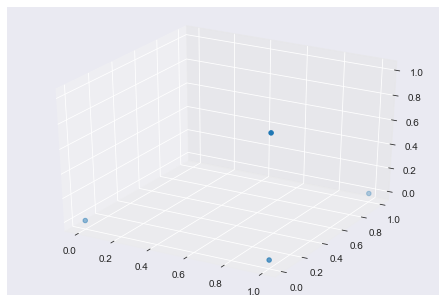

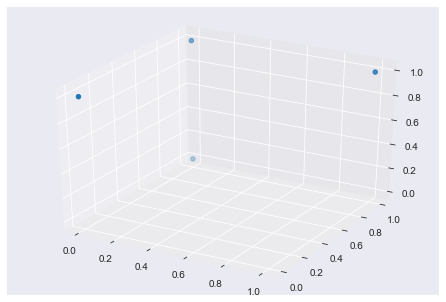

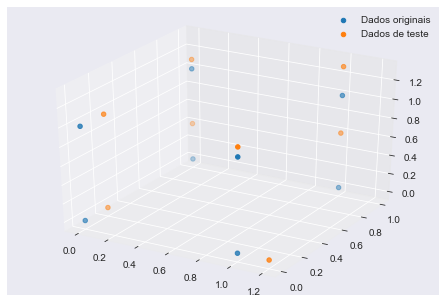

In [15]:
# Dados da classe 1
x1 = [0,1,1,1]
y1 = [0,0,0,1]
z1 = [0,0,1,0]
# Dados da classe 2
x2 = [0,0,0,1]
y2 = [0,1,1,1]
z2 = [1,1,0,1]

#Concatenando os dados para treinar a máquina
x_train = np.array([[0,0,0],[1,0,0],[1,0,1],[1,1,0],[0,0,1],[0,1,1],[0,1,0],[1,1,1]])
y_train = np.array([0,0,0,0,1,1,1,1])

# Dados de teste, gerados apenas alterando levemente os pontos acima
x_test = np.array([[0,0.2,1],[0,1,1.1],[0,1,0.4],[1,1,1.3],[0,0.2,0],[1.2,0,0],[1,0,1.1],[1,1,0.6]])


#plot classe 1

plt.style.use('seaborn-darkgrid')
fig1 = plt.figure()
a1 = Axes3D(fig1)
a1.scatter(x1,y1,z1)
plt.show()

#plot classe 2

fig2 = plt.figure()
a2 = Axes3D(fig2)
a2.scatter(x2,y2,z2)
plt.show()

#plot todos juntos
fig3 = plt.figure()
a2 = Axes3D(fig3)
a2.scatter(x_train[:,0],x_train[:,1],x_train[:,2],label='Dados originais')
a2.scatter(x_test[:,0],x_test[:,1],x_test[:,2],label='Dados de teste')
plt.legend()
plt.show()

### Definição e treinamento da máquina

Dados de entrada: 
 [[0 0 0]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [0 1 0]
 [1 1 1]] 

Rótulos dos dados: 
 [0 0 0 0 1 1 1 1] 



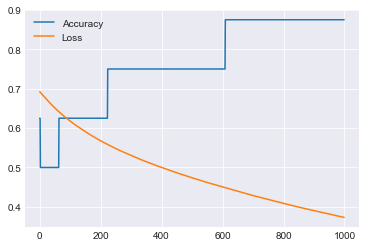

8/8 [==============================] - 0s 7ms/step

Dados para avaliação do treinamento: 
 [0.373112715780735, 0.875]


In [12]:
print('Dados de entrada: \n',x_train,'\n')
print('Rótulos dos dados: \n',y_train,'\n')

#criando o sequential
model = Sequential()
#adicionando uma camada
model.add(Dense(units=1, activation='sigmoid', input_shape=(3,)))
#compilando
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#treinamento de fato
#verbose=0 para nao imprimir cada epoch
history = model.fit(x_train, y_train, epochs=1000, batch_size=4,verbose=0)


plt.plot(history.history['acc'],label='Accuracy')
plt.plot(history.history['loss'],label='Loss')
plt.legend()
plt.show()

#output de métricas de validação
loss_and_metrics = model.evaluate(x_train, y_train, batch_size=1)
print('\nDados para avaliação do treinamento: \n',loss_and_metrics)

In [16]:
#utilizando a máquina após o treinamento
classes = model.predict_classes(x_test)
print(classes)



[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]


# Implementando com a SVM (Sci-kit Learn)

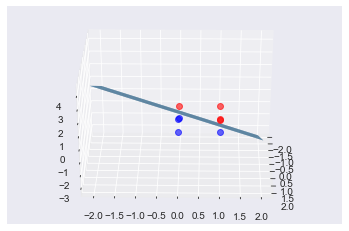

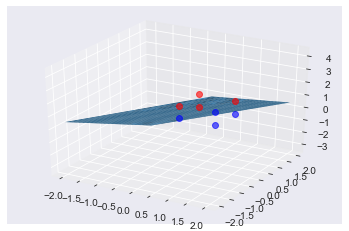

Accuracy:  1.0
[0 0 0 0 1 1 1 1]


In [58]:
# Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object
model = svm.SVC(kernel='linear', C=1, gamma=1) 
# there is various option associated with it, like changing kernel, gamma and C value. 
# Will discuss more about it in next section.
#Train the model using the training sets and check score
model.fit(x_train, y_train)

w = model.coef_[0]

#plotando o hiperplano
z = lambda x,y: (-model.intercept_[0]-model.coef_[0][0]*x-model.coef_[0][1]*y) / model.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))
ax.plot3D(x_train[y_train==0,0], x_train[y_train==0,1], x_train[y_train==0,2],'ob',alpha=0.6)
ax.plot3D(x_train[y_train==1,0], x_train[y_train==1,1], x_train[y_train==1,2],'or',alpha=0.6)
ax.view_init(30, 1)
plt.show()

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))
ax.plot3D(x_train[y_train==0,0], x_train[y_train==0,1], x_train[y_train==0,2],'ob',alpha=0.6)
ax.plot3D(x_train[y_train==1,0], x_train[y_train==1,1], x_train[y_train==1,2],'or',alpha=0.6)
plt.title('')
plt.show()



#Predict Output
predicted = model.predict(x_train)

print('Accuracy: ',accuracy_score(y_train, predicted))

print(predicted)

In [23]:
x_train[y_train==1,1]

array([0, 1, 1, 1])

# EXEMPLO DE CLASSIFICAÇÃO SIMPLES

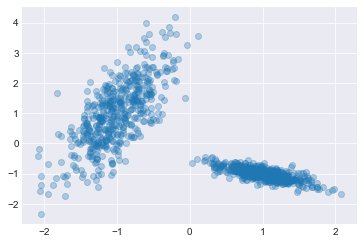

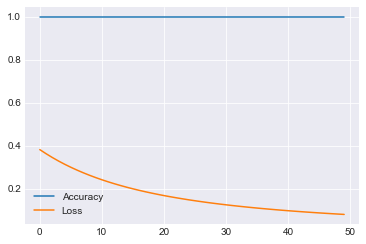

In [14]:
X1, Y1 = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=7, n_clusters_per_class=1)

plt.style.use('seaborn-darkgrid')
plt.scatter(X1[:, 0], X1[:, 1],alpha=0.3)
plt.show()

model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=X1, y=Y1, verbose=0, epochs=50)

plt.style.use('seaborn-darkgrid')
plt.plot(history.history['acc'],label='Accuracy')
plt.plot(history.history['loss'],label='Loss')
plt.legend()
plt.show()

# Implementando o Perceptron com o SKLearn

[0 0 1 1 1 1 1 1]
[1 0 1 1 1 1 1 1]
[0 0 0 0 1 1 1 1]
[0 0 1 1 1 1 1 1]
[0 0 0 1 1 1 1 1]
[0 0 0 0 1 1 1 1]
[0 0 0 0 1 1 1 1]
[0 0 0 0 1 1 1 1]
[0 0 0 0 1 1 1 1]
[0 0 0 0 1 1 1 1]


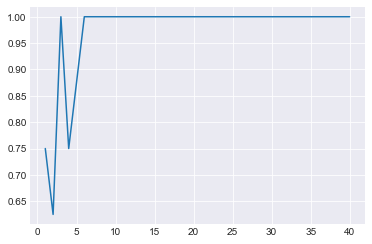

In [47]:
acc = np.zeros(10)
iterations = np.array([1,2,3,4,5,6,15,20,30,40])

#build a variable to keep te accuracy everytime we raise the max_iter
for i in range(0,10):
    
    ppn = Perceptron(max_iter=iterations[i], eta0=1,shuffle=True)
    ppn.fit(x_train, y_train)

    y_pred = ppn.predict(x_train)
    print(y_pred)

    acc[i] = accuracy_score(y_train, y_pred)
    
plt.plot(iterations,acc)
plt.show()